This notebook will use Pytorch to write a classification algorithm to fit into the iris dataset. This notebook was based on the tutorial here: https://machinelearningmastery.com/building-a-multiclass-classification-model-in-pytorch/

In [15]:
import pandas as pd

data = pd.read_csv('data/iris.txt', header=None)
X = data.iloc[:, :4]
y = data.iloc[:, 4:]

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import torch

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(y)
y = ohe.transform(y)

X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, shuffle=True)

In [17]:
import torch.nn as nn

class MultiClass(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(4, 8)
        self.act = nn.ReLU()
        self.output = nn.Linear(8, 3)

    def forward(self, x):
        x = self.act(self.hidden(x))
        return self.output(x)
    
model = MultiClass()

In [19]:
import torch.optim as optim
import tqdm
import numpy as np

optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

n_epochs = 100
batch_size = 5
batches_per_epoch = len(X_train) // batch_size

train_loss_hist = []
test_loss_hist = []
train_acc_hist = []
test_acc_hist = []

for epoch in range(n_epochs):
    model.train()
    epoch_loss = []
    epoch_acc = []
    with tqdm.trange(batches_per_epoch, unit='batch', mininterval=0) as bar:
        bar.set_description(f'Epoch: {epoch}')
        for i in bar:
            start = i * batch_size
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            acc = (torch.argmax(y_pred, 1) == torch.argmax(y_batch, 1)).float().mean()
            epoch_acc.append(acc)
            epoch_loss.append(loss.item())

    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        loss = loss_fn(y_pred, y_test)
        acc = (torch.argmax(y_pred, 1) == torch.argmax(y_test, 1)).float().mean()
        train_loss_hist.append(np.mean(epoch_loss))
        train_acc_hist.append(np.mean(epoch_acc))
        test_loss_hist.append(loss.item())
        test_acc_hist.append(acc)
        print(f'Epoch: {epoch}, loss: {loss.item()}, accuracy: {acc}')

Epoch: 0: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 598.46batch/s]


Epoch: 0, loss: 1.446709156036377, accuracy: 0.34285715222358704


Epoch: 1: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 599.78batch/s]


Epoch: 1, loss: 1.3380414247512817, accuracy: 0.34285715222358704


Epoch: 2: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 564.03batch/s]


Epoch: 2, loss: 1.2487386465072632, accuracy: 0.34285715222358704


Epoch: 3: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 300.78batch/s]


Epoch: 3, loss: 1.1751152276992798, accuracy: 0.34285715222358704


Epoch: 4: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 360.39batch/s]


Epoch: 4, loss: 1.1144441366195679, accuracy: 0.34285715222358704


Epoch: 5: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 392.34batch/s]


Epoch: 5, loss: 1.0650577545166016, accuracy: 0.34285715222358704


Epoch: 6: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 392.33batch/s]


Epoch: 6, loss: 1.024155855178833, accuracy: 0.34285715222358704


Epoch: 7: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 530.85batch/s]


Epoch: 7, loss: 0.9891204833984375, accuracy: 0.34285715222358704


Epoch: 8: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 563.96batch/s]


Epoch: 8, loss: 0.9585070013999939, accuracy: 0.34285715222358704


Epoch: 9: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 601.60batch/s]


Epoch: 9, loss: 0.9312315583229065, accuracy: 0.37142857909202576


Epoch: 10: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 451.16batch/s]


Epoch: 10, loss: 0.9065313339233398, accuracy: 0.6000000238418579


Epoch: 11: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 563.99batch/s]


Epoch: 11, loss: 0.8836669921875, accuracy: 0.6571428775787354


Epoch: 12: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 563.99batch/s]


Epoch: 12, loss: 0.8620022535324097, accuracy: 0.6571428775787354


Epoch: 13: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 451.17batch/s]


Epoch: 13, loss: 0.8404935002326965, accuracy: 0.6571428775787354


Epoch: 14: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 243.58batch/s]


Epoch: 14, loss: 0.817426323890686, accuracy: 0.6571428775787354


Epoch: 15: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 601.58batch/s]


Epoch: 15, loss: 0.790984570980072, accuracy: 0.6571428775787354


Epoch: 16: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 601.60batch/s]


Epoch: 16, loss: 0.7674505114555359, accuracy: 0.6571428775787354


Epoch: 17: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 601.60batch/s]


Epoch: 17, loss: 0.7510096430778503, accuracy: 0.6571428775787354


Epoch: 18: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 564.04batch/s]


Epoch: 18, loss: 0.7366037368774414, accuracy: 0.6571428775787354


Epoch: 19: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 564.05batch/s]


Epoch: 19, loss: 0.7225048542022705, accuracy: 0.6571428775787354


Epoch: 20: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 601.59batch/s]


Epoch: 20, loss: 0.7088077068328857, accuracy: 0.6571428775787354


Epoch: 21: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 601.57batch/s]


Epoch: 21, loss: 0.6956877112388611, accuracy: 0.6571428775787354


Epoch: 22: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 273.46batch/s]


Epoch: 22, loss: 0.6831810474395752, accuracy: 0.6571428775787354


Epoch: 23: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 601.57batch/s]


Epoch: 23, loss: 0.6712228655815125, accuracy: 0.6666666865348816


Epoch: 24: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 564.02batch/s]


Epoch: 24, loss: 0.6597388386726379, accuracy: 0.6666666865348816


Epoch: 25: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 601.62batch/s]


Epoch: 25, loss: 0.6486829519271851, accuracy: 0.6761904954910278


Epoch: 26: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 530.76batch/s]


Epoch: 26, loss: 0.6380055546760559, accuracy: 0.6761904954910278


Epoch: 27: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 601.61batch/s]


Epoch: 27, loss: 0.6276865601539612, accuracy: 0.6857143044471741


Epoch: 28: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 347.07batch/s]


Epoch: 28, loss: 0.6176354289054871, accuracy: 0.6857143044471741


Epoch: 29: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 601.65batch/s]


Epoch: 29, loss: 0.6079059839248657, accuracy: 0.6857143044471741


Epoch: 30: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 601.62batch/s]


Epoch: 30, loss: 0.5985392332077026, accuracy: 0.6857143044471741


Epoch: 31: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 601.56batch/s]


Epoch: 31, loss: 0.5894933342933655, accuracy: 0.7142857313156128


Epoch: 32: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 644.59batch/s]


Epoch: 32, loss: 0.580763041973114, accuracy: 0.7333333492279053


Epoch: 33: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 601.60batch/s]


Epoch: 33, loss: 0.572338879108429, accuracy: 0.7428571581840515


Epoch: 34: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 601.54batch/s]


Epoch: 34, loss: 0.5641884803771973, accuracy: 0.761904776096344


Epoch: 35: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 474.97batch/s]


Epoch: 35, loss: 0.5562710165977478, accuracy: 0.7714285850524902


Epoch: 36: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 474.81batch/s]


Epoch: 36, loss: 0.5486172437667847, accuracy: 0.7714285850524902


Epoch: 37: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 564.03batch/s]


Epoch: 37, loss: 0.5412384271621704, accuracy: 0.7904762029647827


Epoch: 38: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 562.50batch/s]


Epoch: 38, loss: 0.5340948700904846, accuracy: 0.7904762029647827


Epoch: 39: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 601.59batch/s]


Epoch: 39, loss: 0.5271783471107483, accuracy: 0.8095238208770752


Epoch: 40: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 528.78batch/s]


Epoch: 40, loss: 0.5204716920852661, accuracy: 0.8095238208770752


Epoch: 41: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 564.11batch/s]


Epoch: 41, loss: 0.5139704346656799, accuracy: 0.8095238208770752


Epoch: 42: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 321.82batch/s]


Epoch: 42, loss: 0.5076727271080017, accuracy: 0.8190476298332214


Epoch: 43: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 565.48batch/s]


Epoch: 43, loss: 0.5015501976013184, accuracy: 0.8190476298332214


Epoch: 44: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 347.08batch/s]


Epoch: 44, loss: 0.49561646580696106, accuracy: 0.8190476298332214


Epoch: 45: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 564.01batch/s]


Epoch: 45, loss: 0.48985403776168823, accuracy: 0.8190476298332214


Epoch: 46: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 563.99batch/s]


Epoch: 46, loss: 0.4842117726802826, accuracy: 0.8285714387893677


Epoch: 47: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 563.97batch/s]


Epoch: 47, loss: 0.47872698307037354, accuracy: 0.8380952477455139


Epoch: 48: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 220.10batch/s]


Epoch: 48, loss: 0.4733937084674835, accuracy: 0.8476190567016602


Epoch: 49: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 530.84batch/s]


Epoch: 49, loss: 0.4682023227214813, accuracy: 0.8476190567016602


Epoch: 50: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 601.50batch/s]


Epoch: 50, loss: 0.46314090490341187, accuracy: 0.8571428656578064


Epoch: 51: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 501.32batch/s]


Epoch: 51, loss: 0.45820170640945435, accuracy: 0.8666666746139526


Epoch: 52: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 429.89batch/s]


Epoch: 52, loss: 0.4533783197402954, accuracy: 0.8761904835700989


Epoch: 53: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 564.01batch/s]


Epoch: 53, loss: 0.44866514205932617, accuracy: 0.8761904835700989


Epoch: 54: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 598.58batch/s]


Epoch: 54, loss: 0.44405728578567505, accuracy: 0.8761904835700989


Epoch: 55: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 282.00batch/s]


Epoch: 55, loss: 0.4395497739315033, accuracy: 0.8857142925262451


Epoch: 56: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 562.57batch/s]


Epoch: 56, loss: 0.4351379871368408, accuracy: 0.8857142925262451


Epoch: 57: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 375.96batch/s]


Epoch: 57, loss: 0.4308173358440399, accuracy: 0.8857142925262451


Epoch: 58: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 502.81batch/s]


Epoch: 58, loss: 0.42658352851867676, accuracy: 0.8857142925262451


Epoch: 59: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 601.63batch/s]


Epoch: 59, loss: 0.42243263125419617, accuracy: 0.9047619104385376


Epoch: 60: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 564.05batch/s]


Epoch: 60, loss: 0.41836562752723694, accuracy: 0.9142857193946838


Epoch: 61: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 451.18batch/s]


Epoch: 61, loss: 0.4143742620944977, accuracy: 0.9142857193946838


Epoch: 62: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 601.65batch/s]


Epoch: 62, loss: 0.4104554057121277, accuracy: 0.9142857193946838


Epoch: 63: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 376.01batch/s]


Epoch: 63, loss: 0.4066471755504608, accuracy: 0.9238095283508301


Epoch: 64: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 501.30batch/s]


Epoch: 64, loss: 0.40292561054229736, accuracy: 0.9238095283508301


Epoch: 65: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 528.88batch/s]


Epoch: 65, loss: 0.39921194314956665, accuracy: 0.9333333373069763


Epoch: 66: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 564.00batch/s]


Epoch: 66, loss: 0.3956187665462494, accuracy: 0.9333333373069763


Epoch: 67: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 281.67batch/s]


Epoch: 67, loss: 0.39207223057746887, accuracy: 0.9333333373069763


Epoch: 68: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 601.59batch/s]


Epoch: 68, loss: 0.38849011063575745, accuracy: 0.9333333373069763


Epoch: 69: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 563.99batch/s]


Epoch: 69, loss: 0.38503849506378174, accuracy: 0.9333333373069763


Epoch: 70: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 500.79batch/s]


Epoch: 70, loss: 0.3816443979740143, accuracy: 0.9333333373069763


Epoch: 71: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 563.99batch/s]


Epoch: 71, loss: 0.37827688455581665, accuracy: 0.9333333373069763


Epoch: 72: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 601.67batch/s]


Epoch: 72, loss: 0.37495142221450806, accuracy: 0.9333333373069763


Epoch: 73: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 282.00batch/s]


Epoch: 73, loss: 0.3716769516468048, accuracy: 0.9428571462631226


Epoch: 74: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 600.26batch/s]


Epoch: 74, loss: 0.3685169816017151, accuracy: 0.9428571462631226


Epoch: 75: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 225.60batch/s]


Epoch: 75, loss: 0.3653680980205536, accuracy: 0.9428571462631226


Epoch: 76: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 564.04batch/s]


Epoch: 76, loss: 0.36222192645072937, accuracy: 0.9428571462631226


Epoch: 77: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 563.99batch/s]


Epoch: 77, loss: 0.35911229252815247, accuracy: 0.9428571462631226


Epoch: 78: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 501.40batch/s]


Epoch: 78, loss: 0.3561196029186249, accuracy: 0.9428571462631226


Epoch: 79: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 530.79batch/s]


Epoch: 79, loss: 0.3531372547149658, accuracy: 0.9428571462631226


Epoch: 80: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 601.58batch/s]


Epoch: 80, loss: 0.35022401809692383, accuracy: 0.9428571462631226


Epoch: 81: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 347.10batch/s]


Epoch: 81, loss: 0.3472995460033417, accuracy: 0.9428571462631226


Epoch: 82: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 282.00batch/s]


Epoch: 82, loss: 0.3444175124168396, accuracy: 0.9428571462631226


Epoch: 83: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 530.81batch/s]


Epoch: 83, loss: 0.3416607677936554, accuracy: 0.9428571462631226


Epoch: 84: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 530.83batch/s]


Epoch: 84, loss: 0.33891960978507996, accuracy: 0.9428571462631226


Epoch: 85: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 334.23batch/s]


Epoch: 85, loss: 0.3361108601093292, accuracy: 0.9428571462631226


Epoch: 86: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 375.33batch/s]


Epoch: 86, loss: 0.3332923948764801, accuracy: 0.9428571462631226


Epoch: 87: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 601.55batch/s]


Epoch: 87, loss: 0.3306422531604767, accuracy: 0.9428571462631226


Epoch: 88: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 601.61batch/s]


Epoch: 88, loss: 0.3280993402004242, accuracy: 0.9428571462631226


Epoch: 89: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 502.68batch/s]


Epoch: 89, loss: 0.3254455626010895, accuracy: 0.9428571462631226


Epoch: 90: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 644.57batch/s]


Epoch: 90, loss: 0.3228303790092468, accuracy: 0.9428571462631226


Epoch: 91: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 375.36batch/s]


Epoch: 91, loss: 0.3202827572822571, accuracy: 0.9428571462631226


Epoch: 92: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 530.72batch/s]


Epoch: 92, loss: 0.3177441954612732, accuracy: 0.9428571462631226


Epoch: 93: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 601.62batch/s]


Epoch: 93, loss: 0.31529566645622253, accuracy: 0.9428571462631226


Epoch: 94: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 474.95batch/s]


Epoch: 94, loss: 0.31285277009010315, accuracy: 0.9428571462631226


Epoch: 95: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 474.24batch/s]


Epoch: 95, loss: 0.31034356355667114, accuracy: 0.9428571462631226


Epoch: 96: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 644.61batch/s]


Epoch: 96, loss: 0.30790865421295166, accuracy: 0.9428571462631226


Epoch: 97: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 565.85batch/s]


Epoch: 97, loss: 0.3056020140647888, accuracy: 0.9428571462631226


Epoch: 98: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 392.36batch/s]


Epoch: 98, loss: 0.30326804518699646, accuracy: 0.9428571462631226


Epoch: 99: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 562.27batch/s]

Epoch: 99, loss: 0.3009324073791504, accuracy: 0.9428571462631226


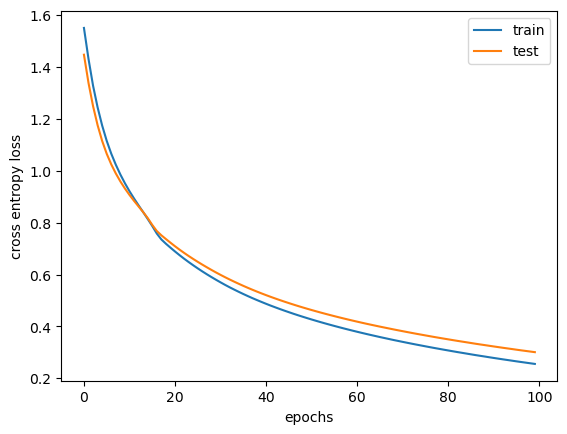

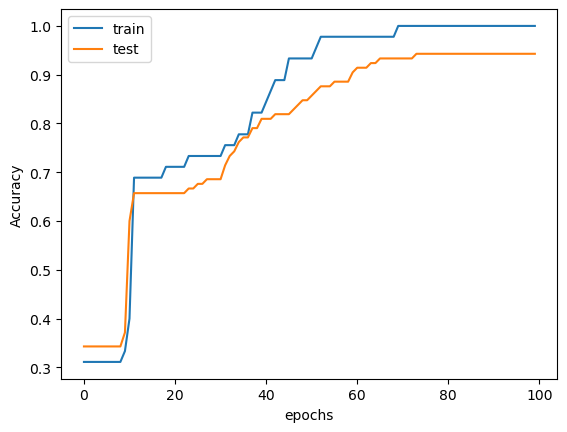

In [20]:
import matplotlib.pyplot as plt

plt.plot(train_loss_hist, label='train')
plt.plot(test_loss_hist, label='test')
plt.xlabel('epochs')
plt.ylabel('cross entropy loss')
plt.legend()
plt.show()

plt.plot(train_acc_hist, label='train')
plt.plot(test_acc_hist, label='test')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()